Name: Jay Chopadekar
email: chopadekarjay@gmail.com

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the data
df = pd.read_csv(r"C:\Users\jaych\Desktop\Fraud_detection\Fraud.csv")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [3]:
df.shape

(6362620, 11)

In [5]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [5]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [9]:
#Looking for null values
print(df.isna().sum())

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


In [16]:
print(df.duplicated().sum())

0


In [7]:
# Check the distribution of the target variable
print("Distribution of fraud cases:")
df['isFraud'].value_counts(normalize=True)*100

Distribution of fraud cases:


isFraud
0    99.870918
1     0.129082
Name: proportion, dtype: float64

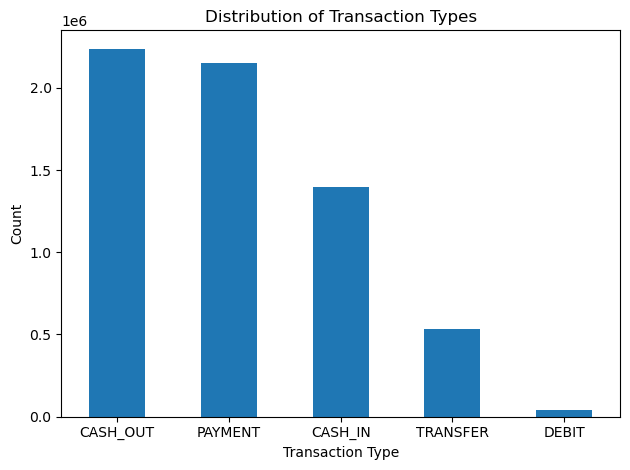

In [8]:
# Plot the distribution of transaction types

df['type'].value_counts().plot(kind='bar')
plt.title('Distribution of Transaction Types')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Data Cleaning

In [9]:
# Filter transactions where oldbalanceOrg and newbalanceOrig are zero and but it was not a fraud (Noise)
noise_transactions1 = df[(df['oldbalanceOrg'] == 0) & (df['newbalanceOrig'] == 0)  & (df['isFraud'] == 0)]

# Count the number of such transactions
noise_count = noise_transactions1.shape[0]
noise_count


2088944

In [10]:
# Remove these noisy_transactions1 from the dataset
df = df.drop(noise_transactions1.index)

noise_transactions1 = df[(df['oldbalanceOrg'] == 0) & (df['newbalanceOrig'] == 0) & (df['isFraud'] == 0)]

# Count the number of such transactions
noise_count = noise_transactions1.shape[0]
noise_count

0

In [11]:
# Filter transactions where oldbalanceDest and newbalanceDest are zero for non-merchant accounts
non_merchant_noise = df[(df['oldbalanceDest'] == 0) & (df['newbalanceDest'] == 0) & (~df['nameDest'].str.startswith('M')) & (df['isFraud'] == 0)]

# Count the number of such transactions
non_merchant_noise_count = non_merchant_noise.shape[0]
non_merchant_noise_count



161687

In [12]:
# Remove these noisy transactions from the dataset
df_cleaned = df.drop(non_merchant_noise.index)

non_merchant_noise = df_cleaned[(df_cleaned['oldbalanceDest'] == 0) & (df_cleaned['newbalanceDest'] == 0) & (~df_cleaned['nameDest'].str.startswith('M')) & (df_cleaned['isFraud'] == 0)]

# Count the number of such transactions
non_merchant_noise_count = non_merchant_noise.shape[0]
non_merchant_noise_count


0

Outlier Detection

In [13]:
# Calculate Q1 and Q3 for the 'amount' column
Q1 = df_cleaned['amount'].quantile(0.25)
Q3 = df_cleaned['amount'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df_cleaned[(df_cleaned['amount'] < lower_bound) | (df_cleaned['amount'] > upper_bound)]

# Count of outliers
outlier_count = outliers.shape[0]

# Display outlier details and counts
print(outlier_count),
outliers.head()

188785


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
132,1,TRANSFER,679502.24,C722417467,290.00,0.00,C451111351,171866.00,3940085.21,0,0
345,1,TRANSFER,522264.81,C1927963027,24.00,0.00,C1234776885,11361.00,2025098.66,0,0
411,1,CASH_IN,764772.98,C482307698,3946209.08,4710982.07,C985934102,3056433.58,971418.91,0,0
465,1,CASH_IN,628719.07,C2022689531,2726760.74,3355479.81,C1359044626,1484768.73,16518.36,0,0
552,1,CASH_OUT,562903.81,C24039137,9045.19,0.00,C33524623,564519.90,1517262.16,0,0


In [14]:
# Identify the outlier transactions in the original DataFrame
outlier_transactions = df_cleaned[df_cleaned['amount'].isin(outliers['amount'])]

# Count of fraudulent and flagged transactions among outliers
fraud_count = outlier_transactions['isFraud'].value_counts()
flagged_count = outlier_transactions['isFlaggedFraud'].value_counts()

# Display the counts
print("Fraudulent Transactions among Outliers:")
print(fraud_count)

print("\nFlagged Transactions among Outliers:")
print(flagged_count)

Fraudulent Transactions among Outliers:
isFraud
0    184889
1      3896
Name: count, dtype: int64

Flagged Transactions among Outliers:
isFlaggedFraud
0    188771
1        14
Name: count, dtype: int64


# Encoding

In [15]:
#Converting 'type' column into numerical columns
encoded_df = pd.get_dummies(df_cleaned, columns=['type'], drop_first=True)

encoded_df.head()

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,False,False,True,False
1,1,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,False,False,True,False
2,1,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,False,False,False,True
3,1,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,True,False,False,False
4,1,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,False,False,True,False


In [16]:
encoded_df.shape

(4111989, 14)

In [17]:
encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4111989 entries, 0 to 6362619
Data columns (total 14 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   amount          float64
 2   nameOrig        object 
 3   oldbalanceOrg   float64
 4   newbalanceOrig  float64
 5   nameDest        object 
 6   oldbalanceDest  float64
 7   newbalanceDest  float64
 8   isFraud         int64  
 9   isFlaggedFraud  int64  
 10  type_CASH_OUT   bool   
 11  type_DEBIT      bool   
 12  type_PAYMENT    bool   
 13  type_TRANSFER   bool   
dtypes: bool(4), float64(5), int64(3), object(2)
memory usage: 360.8+ MB


# Correlation

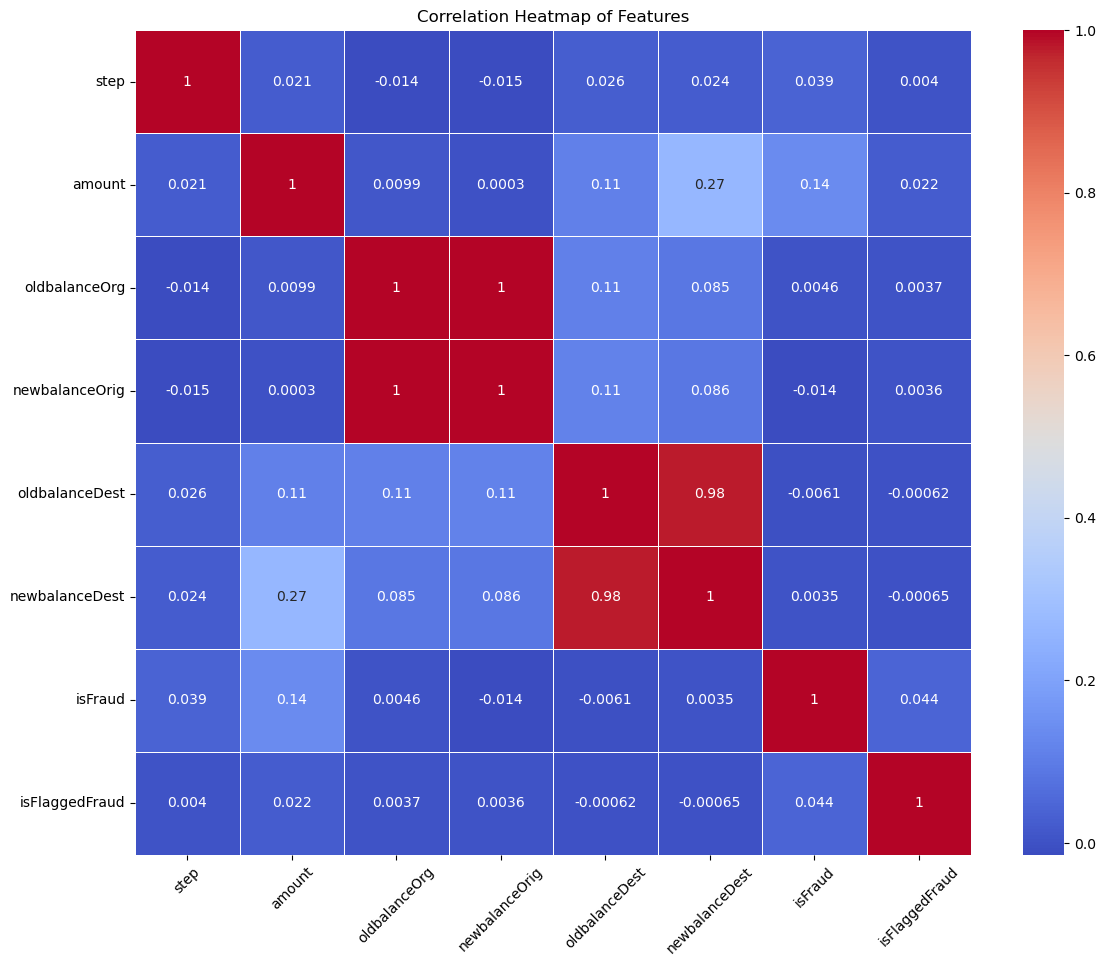

In [18]:
# Exclude non-numeric columns for correlation analysis
numeric_df = encoded_df.select_dtypes(include=[np.number])

# Compute correlation matrix for numeric columns only
correlation_matrix = numeric_df.corr()

# Plot heatmap of correlations
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Features')
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

In [19]:
#We can see multicollinearity between 'oldbalancesdest' & 'newbalancedest', 'oldbalanceorg' & 'newbalanceOrig'

mul_columns = ['oldbalanceDest', 'oldbalanceOrg']
encoded_df = encoded_df.drop(mul_columns, axis=1)
encoded_df.head()

,step,amount,nameOrig,newbalanceOrig,nameDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,C1231006815,160296.36,M1979787155,0.0,0,0,False,False,True,False
1,1,1864.28,C1666544295,19384.72,M2044282225,0.0,0,0,False,False,True,False
2,1,181.00,C1305486145,0.00,C553264065,0.0,1,0,False,False,False,True
3,1,181.00,C840083671,0.00,C38997010,0.0,1,0,True,False,False,False
4,1,11668.14,C2048537720,29885.86,M1230701703,0.0,0,0,False,False,True,False


In [20]:
encoded_df.shape

(4111989, 12)

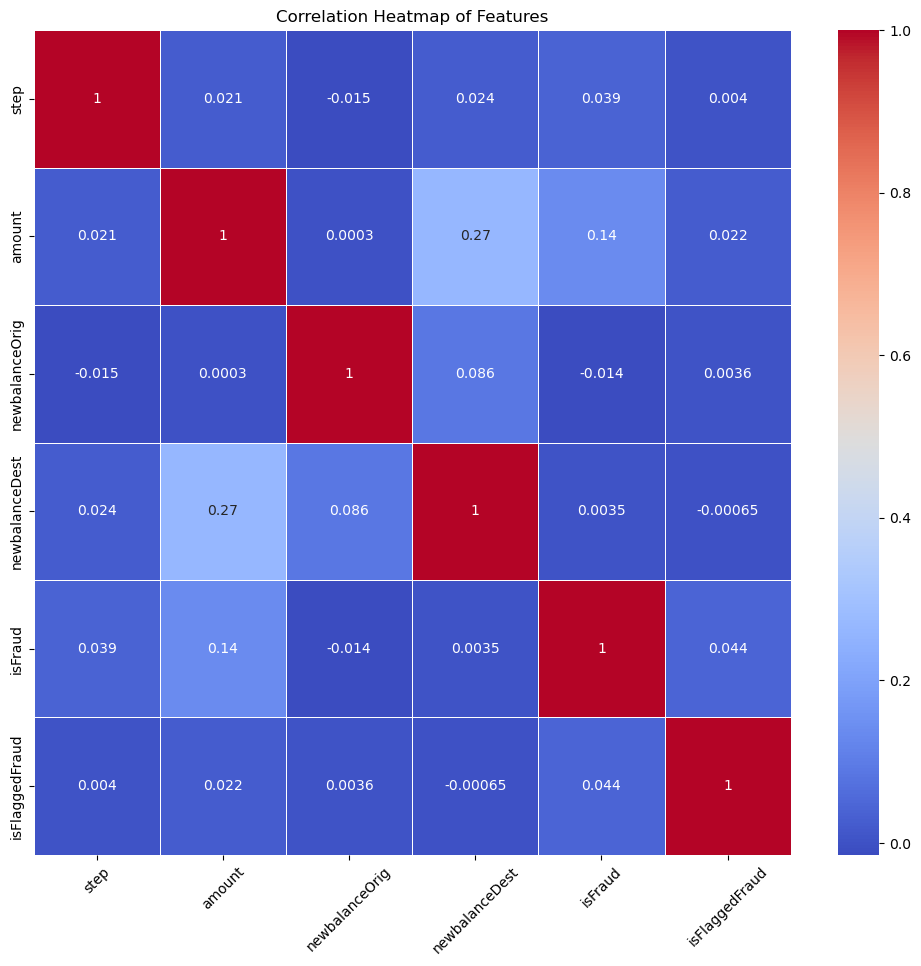

In [21]:
# Exclude non-numeric columns for correlation analysis
numeric_df = encoded_df.select_dtypes(include=[np.number])

# Compute correlation matrix for numeric columns only
correlation_matrix = numeric_df.corr()

# Plot heatmap of correlations
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Features')
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

# Random Forest

In [56]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score, recall_score
from sklearn.utils import class_weight
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE

In [23]:
df = encoded_df

In [24]:
df.head()

,step,amount,nameOrig,newbalanceOrig,nameDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,C1231006815,160296.36,M1979787155,0.0,0,0,False,False,True,False
1,1,1864.28,C1666544295,19384.72,M2044282225,0.0,0,0,False,False,True,False
2,1,181.00,C1305486145,0.00,C553264065,0.0,1,0,False,False,False,True
3,1,181.00,C840083671,0.00,C38997010,0.0,1,0,True,False,False,False
4,1,11668.14,C2048537720,29885.86,M1230701703,0.0,0,0,False,False,True,False


In [25]:
# Define features and target
X = df.drop(columns=['isFraud', 'nameOrig', 'nameDest'])
y = df['isFraud']

In [26]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [27]:
rf = RandomForestClassifier(n_estimators=100, 
                            max_depth=10, 
                            min_samples_split=5, 
                            min_samples_leaf=2, 
                            random_state=42, 
                            class_weight='balanced')

In [28]:
rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10,
                       min_samples_leaf=2, min_samples_split=5,
                       random_state=42)

In [29]:
y_pred = rf.predict(X_test)

In [32]:
# Accuracy and classification report
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9713504491337123

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99   1231133
           1       0.06      0.89      0.11      2464

    accuracy                           0.97   1233597
   macro avg       0.53      0.93      0.55   1233597
weighted avg       1.00      0.97      0.98   1233597



In [37]:
# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Confusion Matrix:
 [[1196067   35066]
 [    276    2188]]


In [38]:
import pickle

# Save the model
with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(rf, file)

# XGBoost (Final)

In [41]:
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix

In [42]:
# Prepare the DMatrix for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Setting parameters for XGBoost
params = {
    'objective': 'binary:logistic',                   
    'eval_metric': 'logloss',                         
    'scale_pos_weight': len(y_train) / sum(y_train),  
    'max_depth': 10,                                  
    'eta': 0.1,                                       
    'seed': 42                                       
}

# Training
bst = xgb.train(params, dtrain, num_boost_round=100)

# Predict
y_pred = bst.predict(dtest)
y_pred_binary = [1 if pred > 0.5 else 0 for pred in y_pred]

# Evaluate
print(confusion_matrix(y_test, y_pred_binary))
print(classification_report(y_test, y_pred_binary))


[[1204769   26364]
 [    267    2197]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99   1231133
           1       0.08      0.89      0.14      2464

    accuracy                           0.98   1233597
   macro avg       0.54      0.94      0.57   1233597
weighted avg       1.00      0.98      0.99   1233597



# Tuning the model

In [43]:
from sklearn.model_selection import GridSearchCV


xgb_model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', seed=42)


param_grid = {
    'max_depth': [5, 10, 15],
    'eta': [0.01, 0.1, 0.3],
    'n_estimators': [100, 200, 300],
    'scale_pos_weight': [len(y_train) / sum(y_train)],  
}

# Set up the grid search
grid_search = GridSearchCV(estimator=xgb_model,
                           param_grid=param_grid,
                           scoring='f1', 
                           cv=3,
                           verbose=1,
                           n_jobs=-1)

grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters: ", best_params)
print("Best F1 Score: ", best_score)


Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best Parameters:  {'eta': 0.3, 'max_depth': 15, 'n_estimators': 300, 'scale_pos_weight': 500.6769873021395}
Best F1 Score:  0.6767186257168311


In [44]:
# Refiting the model with best parameters
best_xgb_model = xgb.XGBClassifier(
    eta=0.3,
    max_depth=15,
    n_estimators=300,
    scale_pos_weight=500.68,
    objective='binary:logistic',
    eval_metric='logloss',
    seed=42
)

best_xgb_model.fit(X_train, y_train)
 

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.3, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=15,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=300,
              n_jobs=None, num_parallel_tree=None, ...)

In [45]:
#Evaluation

from sklearn.metrics import classification_report, confusion_matrix

# Predictions
y_pred = best_xgb_model.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Classification Report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)


Confusion Matrix:
 [[1229969    1164]
 [    739    1725]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1231133
           1       0.60      0.70      0.64      2464

    accuracy                           1.00   1233597
   macro avg       0.80      0.85      0.82   1233597
weighted avg       1.00      1.00      1.00   1233597



In [46]:
#Saving the model

model_filename = 'tuned_xgboost_model.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(best_xgb_model, file)

## The below model shows the trade-off between recall & precision 

In [61]:
# Refitting the model with best parameters, focusing on increasing recall
xgb_model2 = xgb.XGBClassifier(
    eta=0.1, 
    max_depth=15,
    n_estimators=300,
    scale_pos_weight=600,
    objective='binary:logistic',
    eval_metric='aucpr', 
    seed=42
)

# Fitting the model
xgb_model2.fit(X_train, y_train)

# Lowering the threshold to increase recall
from sklearn.metrics import precision_recall_curve

# Predict probabilities
y_probs = xgb_model2.predict_proba(X_train)[:, 1]


threshold = 0.3  
y_pred_adjusted = (y_probs >= threshold).astype(int)



In [62]:
# Evaluate recall on the training set
recall_adjusted = recall_score(y_train, y_pred_adjusted)
print(f"Adjusted Recall: {recall_adjusted}")

Adjusted Recall: 1.0


In [63]:
# Predict probabilities on the test set
y_probs_test = xgb_model2.predict_proba(X_test)[:, 1]

# Use the same adjusted threshold for predictions
y_pred_adjusted_test = (y_probs_test >= threshold).astype(int)

# Calculate recall and precision on the test set
from sklearn.metrics import classification_report

print("Classification Report on Test Set:")
print(classification_report(y_test, y_pred_adjusted_test))


Classification Report on Test Set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1231133
           1       0.37      0.74      0.50      2464

    accuracy                           1.00   1233597
   macro avg       0.69      0.87      0.75   1233597
weighted avg       1.00      1.00      1.00   1233597



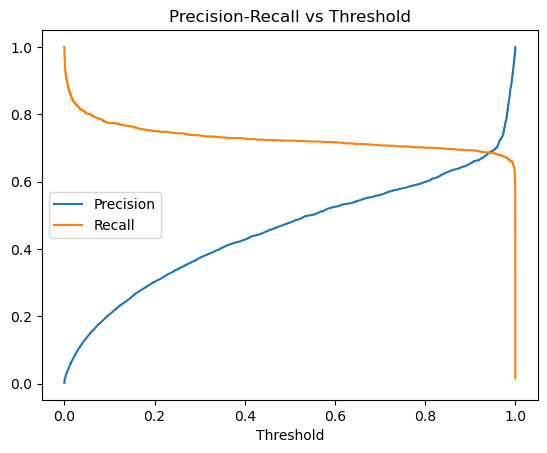

In [64]:
# Get precision-recall values
precision, recall, thresholds = precision_recall_curve(y_test, y_probs_test)

# Plot the precision-recall curve
plt.plot(thresholds, precision[:-1], label="Precision")
plt.plot(thresholds, recall[:-1], label="Recall")
plt.xlabel("Threshold")
plt.legend()
plt.title("Precision-Recall vs Threshold")
plt.show()

In [65]:
# Adjust the threshold for predictions (instead of default 0.5)
threshold = 0.
y_pred_adjusted = (y_probs >= threshold).astype(int)

# Predict probabilities on the test set
y_probs_test = xgb_model2.predict_proba(X_test)[:, 1]
y_pred_adjusted_test = (y_probs_test >= threshold).astype(int)

# Calculate recall and precision on the test set
from sklearn.metrics import classification_report

print("Classification Report on Test Set:")
print(classification_report(y_test, y_pred_adjusted_test))


Classification Report on Test Set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1231133
           1       0.65      0.69      0.67      2464

    accuracy                           1.00   1233597
   macro avg       0.83      0.85      0.84   1233597
weighted avg       1.00      1.00      1.00   1233597



In [66]:
#Saving the model

model_filename = 'xgboost_model2.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(xgb_model2, file)